# Load data 

首先请你学习plot_waterfall_with_subplot函数，熟悉瀑布图绘制的基本逻辑

其次请你学习analyze_policy_paths_by_pixel_with_ci函数，熟悉各个价格的基本逻辑

现在我需要按照不同政策类别绘制不同的瀑布图（不要P4、一共9个子图，每个图30mm的width，按照3×3排列）+Overall（含有P4）的图

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib

# Load data
df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_pv_npv = pd.read_csv(r'data\US_data\df_pv_npv.csv')
df_agricultural_npv=pd.read_csv(r'data\US_data\df_agricultural_npv.csv')
df_afforestation_npv=pd.read_csv(r'data\US_data\df_afforestation_npv.csv')
df_natural_npv=pd.read_csv(r'data\US_data\df_natural_npv.csv')
df_weight=pd.read_csv(r'data\US_data\df_weight.csv')

# 定义政策类别（不包括P4）
policy_categories = ['P1a', 'P1b', 'P1c', 'P1d', 'P2a', 'P2c', 'P2', 'P3a', 'P3b', 'P3c']

print(f"Policy categories: {policy_categories}")
print(f"Total categories: {len(policy_categories)}")


Policy categories: ['P1a', 'P1b', 'P1c', 'P1d', 'P2a', 'P2c', 'P2', 'P3a', 'P3b', 'P3c']
Total categories: 10


In [2]:
df_pv_npv = df_pv_npv.drop(columns=['cumulative_npv_usd'], errors='ignore')
df_pv_npv = df_pv_npv.rename(columns={'cumulative_npv_usd_adjusted': 'cumulative_npv_usd'})
df_pv_npv

,pixel_id,lat,lon,Model,Scenario,Policy_category,Category,analysis_year,cumulative_cost_usd,cumulative_npv_usd
0,235,33.595833,-117.587500,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,2.391378e+06,-2.391378e+06
1,236,33.629166,-117.579170,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,2.391378e+06,-2.391378e+06
2,237,33.720833,-117.737500,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,2.391378e+06,-2.391378e+06
3,238,33.904167,-117.820830,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,2.391378e+06,-2.391378e+06
4,239,33.920834,-117.620834,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,2.391378e+06,-2.391378e+06
...,...,...,...,...,...,...,...,...,...,...
74557215,71746,47.262500,-68.379166,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4.706997e+06,4.191358e+06
74557216,71747,47.262500,-68.370834,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4.706997e+06,4.215208e+06
74557217,71748,47.270832,-68.387500,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4.706997e+06,4.144786e+06
74557218,71749,47.270832,-68.370834,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4.706997e+06,4.143464e+06


In [3]:

df_economic

,lat,lon,pv_category,pv_model,pv_scenario,policy_category,rcp_category,net_npv_usd,analysis_year
0,33.595833,-117.587500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389517e+06,2020
1,33.629166,-117.579170,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389462e+06,2020
2,33.720833,-117.737500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389492e+06,2020
3,33.904167,-117.820830,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.390356e+06,2020
4,33.920834,-117.620834,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.390268e+06,2020
...,...,...,...,...,...,...,...,...,...
74557215,47.262500,-68.379166,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,2.464577e+06,2050
74557216,47.262500,-68.370834,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,2.481259e+06,2050
74557217,47.270832,-68.387500,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,2.431978e+06,2050
74557218,47.270832,-68.370834,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,2.431043e+06,2050


第一，建议保持统一纵轴范围（目前已做到），但可以加上轻微灰色网格线（如 ax.grid(True, axis='y', linestyle='--', alpha=0.3)），增加层次感。
第二，面板标题重新设计，取消面板标题p1a-p3c，每个图片取消上边框与右边框    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
第三，为3×3的图片创建网格，让各个subplot在各个网格中居中

In [4]:
def calculate_waterfall_data_by_policy_categories(
    df_pv_npv, df_agricultural_npv, df_afforestation_npv, 
    df_natural_npv, df_economic, df_weight, policy_categories, target_year=2050):
    """
    计算指定政策类别的瀑布图数据
    
    Parameters
    ----------
    df_pv_npv : DataFrame
        光伏NPV数据
    df_agricultural_npv : DataFrame
        农业NPV数据
    df_afforestation_npv : DataFrame
        造林NPV数据
    df_natural_npv : DataFrame
        自然恢复NPV数据
    df_economic : DataFrame
        经济可行性数据
    df_weight : DataFrame
        权重数据
    policy_categories : list
        政策类别列表，如 ['P1a', 'P1b', 'P1c', 'P1d', 'P2a', 'P2c', 'P2', 'P3a', 'P3b', 'P3c']
    target_year : int
        目标年份，默认2050
        
    Returns
    -------
    df_benefit : DataFrame
        包含所有政策类别的瀑布图数据
    df_opportunity : DataFrame
        各RCP类别下的机会成本期望值
    """
    import pandas as pd
    import numpy as np
    
    # 列名小写
    for df in [df_pv_npv, df_agricultural_npv, df_afforestation_npv, df_natural_npv, df_economic, df_weight]:
        df.columns = df.columns.str.lower()
    
    # 筛选目标年份数据
    pv_data = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    agri_data = df_agricultural_npv[df_agricultural_npv['analysis_year'] == target_year].copy()
    aff_data = df_afforestation_npv[df_afforestation_npv['analysis_year'] == target_year].copy()
    natural_data = df_natural_npv[df_natural_npv['analysis_year'] == target_year].copy()
    economic_data = df_economic[df_economic['analysis_year'] == target_year].copy()
    
    # 合并权重数据
    def merge_with_weight(df, weight_cols):
        return df.merge(df_weight[['lat', 'lon'] + weight_cols], on=['lat', 'lon'], how='left')
    
    agri_weighted = merge_with_weight(agri_data, ['weighted_density_agricultural'])
    aff_weighted = merge_with_weight(aff_data, ['weighted_density_forest'])
    natural_weighted = merge_with_weight(natural_data, ['weighted_density_vegetation'])
    
    # ========== 新增：计算 df_opportunity ==========
    # 识别 RCP 列名（可能在 rcp_category, RCP_Category 等）
    def find_rcp_column(df):
        for col in df.columns:
            if 'rcp' in col.lower() and 'category' in col.lower():
                return col
        return None
    
    rcp_col_agri = find_rcp_column(agri_data)
    rcp_col_aff = find_rcp_column(aff_data)
    rcp_col_natural = find_rcp_column(natural_data)
    
    # 准备机会成本数据
    opportunity_results = []
    
    if rcp_col_agri and rcp_col_aff and rcp_col_natural:
        # 获取所有唯一的 RCP 类别
        all_rcps = sorted(set(agri_weighted[rcp_col_agri].dropna().unique()) | 
                          set(aff_weighted[rcp_col_aff].dropna().unique()) | 
                          set(natural_weighted[rcp_col_natural].dropna().unique()))
        
        print(f"\n发现 RCP 类别: {all_rcps}")
        
        # 为每个 RCP 类别计算期望值
        for rcp in all_rcps:
            # 筛选该 RCP 的数据
            agri_rcp = agri_weighted[agri_weighted[rcp_col_agri] == rcp].copy()
            aff_rcp = aff_weighted[aff_weighted[rcp_col_aff] == rcp].copy()
            natural_rcp = natural_weighted[natural_weighted[rcp_col_natural] == rcp].copy()
            
            if not agri_rcp.empty and not aff_rcp.empty and not natural_rcp.empty:
                # 像素级别计算
                agri_pixel_rcp = agri_rcp.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_agricultural']].mean()
                aff_pixel_rcp = aff_rcp.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_forest']].mean()
                natural_pixel_rcp = natural_rcp.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_vegetation']].mean()
                
                # 合并数据
                merged_rcp = agri_pixel_rcp.merge(aff_pixel_rcp, on=['lat', 'lon'], how='inner', suffixes=('', '_aff'))
                merged_rcp = merged_rcp.merge(natural_pixel_rcp, on=['lat', 'lon'], how='inner', suffixes=('', '_natural'))
                
                # 计算各组成部分的期望值
                agricultural_expected = (merged_rcp['weighted_density_agricultural'] * merged_rcp['cumulative_npv_usd']).mean()
                forest_expected = (merged_rcp['weighted_density_forest'] * merged_rcp['cumulative_npv_usd_aff']).mean()
                vegetation_expected = (merged_rcp['weighted_density_vegetation'] * merged_rcp['cumulative_npv_usd_natural']).mean()
                
                opportunity_results.append({
                    'RCP_Category': rcp,
                    'Agricultural_Expected': agricultural_expected,
                    'Forest_Expected': forest_expected,
                    'Vegetation_Expected': vegetation_expected,
                    'Total_Expected': agricultural_expected + forest_expected + vegetation_expected
                })
    
    df_opportunity = pd.DataFrame(opportunity_results)
    
    # 存储所有结果
    results = []
    
    # 为每个政策类别计算
    for policy in policy_categories:
        # 筛选该政策的数据
        pv_subset = pv_data[pv_data['policy_category'] == policy].copy()
        economic_subset = economic_data[economic_data['policy_category'] == policy].copy()
        
        # 1. Revenue (收入) - cumulative_npv_usd + cumulative_cost_usd
        if not pv_subset.empty:
            pv_grouped = pv_subset.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'cumulative_cost_usd']].mean()
            revenue_mean = (pv_grouped['cumulative_npv_usd'] + pv_grouped['cumulative_cost_usd']).mean()
        else:
            revenue_mean = 0
        
        # 2. Expenditure (支出) - cumulative_cost_usd
        if not pv_subset.empty:
            pv_grouped = pv_subset.groupby(['lat', 'lon'], as_index=False)['cumulative_cost_usd'].mean()
            expenditure_mean = pv_grouped['cumulative_cost_usd'].mean()
        else:
            expenditure_mean = 0
        
        # 3. Opportunity (机会成本) - 使用所有像素的平均值
        agri_pixel = agri_weighted.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_agricultural']].mean()
        aff_pixel = aff_weighted.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_forest']].mean()
        natural_pixel = natural_weighted.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'weighted_density_vegetation']].mean()
        
        # 合并数据
        merged = agri_pixel.merge(aff_pixel, on=['lat', 'lon'], how='inner', suffixes=('', '_aff'))
        merged = merged.merge(natural_pixel, on=['lat', 'lon'], how='inner', suffixes=('', '_natural'))
        
        # 计算像素级别的机会成本
        merged['pixel_opportunity_cost'] = (
            merged['weighted_density_forest'] * merged['cumulative_npv_usd_aff'] +
            merged['weighted_density_agricultural'] * merged['cumulative_npv_usd'] +
            merged['weighted_density_vegetation'] * merged['cumulative_npv_usd_natural']
        )
        
        opportunity_mean = merged['pixel_opportunity_cost'].mean()
        
        # 4. Net (净收益) - net_npv_usd
        if not economic_subset.empty:
            economic_grouped = economic_subset.groupby(['lat', 'lon'], as_index=False)['net_npv_usd'].mean()
            net_mean = economic_grouped['net_npv_usd'].mean()
        else:
            net_mean = 0
        
        # 记录结果
        results.append({
            'policy_category': policy,
            'Revenue_Mean': revenue_mean,
            'Expenditure_Mean': expenditure_mean,
            'Opportunity_Mean': opportunity_mean,
            'Net_Mean': net_mean
        })
    
    # 计算 Overall (包含所有P1, P2, P3政策，P4也包含)
    pv_overall = pv_data.copy()
    economic_overall = economic_data.copy()
    
    # Revenue Overall
    if not pv_overall.empty:
        pv_overall_grouped = pv_overall.groupby(['lat', 'lon'], as_index=False)[['cumulative_npv_usd', 'cumulative_cost_usd']].mean()
        revenue_overall = (pv_overall_grouped['cumulative_npv_usd'] + pv_overall_grouped['cumulative_cost_usd']).mean()
    else:
        revenue_overall = 0
    
    # Expenditure Overall
    if not pv_overall.empty:
        pv_overall_grouped = pv_overall.groupby(['lat', 'lon'], as_index=False)['cumulative_cost_usd'].mean()
        expenditure_overall = pv_overall_grouped['cumulative_cost_usd'].mean()
    else:
        expenditure_overall = 0
    
    # Opportunity Overall (使用所有像素)
    opportunity_overall = merged['pixel_opportunity_cost'].mean()
    
    # Net Overall
    if not economic_overall.empty:
        economic_overall_grouped = economic_overall.groupby(['lat', 'lon'], as_index=False)['net_npv_usd'].mean()
        net_overall = economic_overall_grouped['net_npv_usd'].mean()
    else:
        net_overall = 0
    
    # 添加 Overall
    results.append({
        'policy_category': 'Overall',
        'Revenue_Mean': revenue_overall,
        'Expenditure_Mean': expenditure_overall,
        'Opportunity_Mean': opportunity_overall,
        'Net_Mean': net_overall
    })
    
    # 转换为 DataFrame
    df_benefit = pd.DataFrame(results)
    
    return df_benefit, df_opportunity


# 使用示例
policy_categories = ['P1a', 'P1b', 'P1c', 'P1d', 'P2a', 'P2c', 'P2', 'P3a', 'P3b', 'P3c']

df_benefit_for_waterfall, df_opportunity = calculate_waterfall_data_by_policy_categories(
    df_pv_npv, df_agricultural_npv, df_afforestation_npv, 
    df_natural_npv, df_economic, df_weight, 
    policy_categories, target_year=2050
)



发现 RCP 类别: ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']


In [5]:
df_benefit_for_waterfall.replace({'policy_category': {'P2': 'P2b'}}, inplace=True)
df_benefit_for_waterfall

,policy_category,Revenue_Mean,Expenditure_Mean,Opportunity_Mean,Net_Mean
0,P1a,2.754030e+06,5.444369e+06,-799.336632,-2.726259e+06
1,P1b,3.291713e+06,5.497964e+06,-799.336632,-2.207731e+06
2,P1c,4.989486e+06,5.243445e+06,-799.336632,-7.586644e+04
3,P1d,2.637316e+06,4.171956e+06,-799.336632,-1.444327e+06
4,P2a,5.343923e+06,5.543635e+06,-799.336632,-2.359240e+04
5,P2c,3.732909e+06,5.866036e+06,-799.336632,-2.118899e+06
6,P2b,3.321407e+06,4.225846e+06,-799.336632,-7.595821e+05
7,P3a,3.611629e+06,5.381052e+06,-799.336632,-1.731336e+06
8,P3b,7.229343e+06,5.188424e+06,-799.336632,2.424489e+06
9,P3c,3.137213e+06,2.959927e+06,-799.336632,4.387446e+05


# 2、Plot Waterfall


布局信息:
  图形尺寸: 95.0mm x 82.0mm
  每个子图: 24.33mm x 22.00mm
  水平间距: 2.00mm
  垂直间距: 1.00mm
  列头高度: 6.0mm
  行头宽度: 8.0mm
  极窄轴宽度: 0.095mm


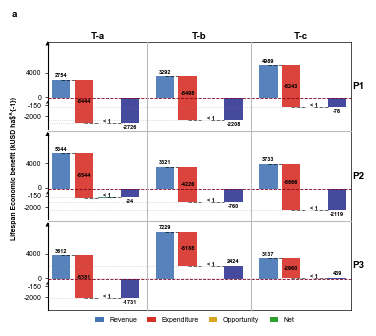

In [6]:
def add_y_break_marks(ax, y_frac, *, width=0.008, half_len=0.01, gap=0.010, lw=0.5, color='k'):
    """在 y=y_frac 处画左侧断轴符号（稍微上移一点）"""
    tr = ax.transAxes
    shift = 0.015  # 上移的量，可根据需要调整
    y = y_frac + shift
    x0, x1 = 0.0 - width, 0.0 + width
    ax.plot([x0, x1], [y - half_len, y + half_len], transform=tr,
            color=color, lw=lw, clip_on=False, zorder=20)
    ax.plot([x0, x1], [y - half_len - gap, y + half_len - gap], transform=tr,
            color=color, lw=lw, clip_on=False, zorder=20)

def draw_bar_between(ax, x, v0, v1, color, width, y_transform, breaks=(-150.0, 0.0), alpha=0.9):
    """在 v0→v1 之间按分段轴映射画段柱"""
    if v0 == v1:
        return
    pts = [v0] + [b for b in breaks if (v0 < b < v1) or (v1 < b < v0)] + [v1]
    pts.sort()
    for a, b in zip(pts[:-1], pts[1:]):
        yb, yt = y_transform(min(a, b)), y_transform(max(a, b))
        h = abs(yt - yb)
        if h > 0:
            ax.bar(x, h, width=width, bottom=min(yb, yt),
                   color=color, alpha=alpha, edgecolor='none', linewidth=0)

def draw_from_zero(ax, x, value_k, width, color, y_transform):
    draw_bar_between(ax, x, 0.0, value_k, color, width, y_transform)

def draw_from_end(ax, x, before_k, after_k, width, color, y_transform):
    draw_bar_between(ax, x, before_k, after_k, color, width, y_transform)

def draw_from_end_linear_signed(ax, x, before_k, after_k, width, ytr, color, alpha=0.95):
    """纯线性轴：以 before→after 画带符号高度的段柱"""
    yb, ya = ytr(before_k), ytr(after_k)
    h = ya - yb
    if abs(h) < 1e-12:
        return
    ax.bar(x, h, width=width, bottom=yb, color=color, alpha=alpha, edgecolor='none')

def build_linear_transform(vmin, vmax):
    span = max(vmax - vmin, 1e-9)
    return lambda v: (v - vmin) / span



def build_segmented_axis(y_stretch_neg_max=-150.0, y_stretch_pos_max=0.0,
                         neg_stretch_ratio=0.10, pos_stretch_ratio=0.0, normal_ratio=0.90,
                         y_min=-3500.0, y_max=8500.0):
    """
    构建分段Y轴（统一范围：负轴-3500到0，正轴0到8500）
    
    Parameters
    ----------
    y_stretch_neg_max : float
        负向拉伸区域的结束值，默认-150.0
    y_stretch_pos_max : float
        正向拉伸区域的结束值，默认0.0
    neg_stretch_ratio : float
        负向拉伸区域占轴的比例，默认0.10
    pos_stretch_ratio : float
        正向拉伸区域占轴的比例，默认0.0
    normal_ratio : float
        正常比例区域占轴的比例，默认0.90
    y_min : float
        固定Y轴最小值，默认-3500.0
    y_max : float
        固定Y轴最大值，默认8500.0
    
    Returns
    -------
    y_transform : function
        Y轴转换函数，将数据值转换为0-1范围
    ticks : list
        刻度值列表
    info : dict
        分段轴信息字典
    """
    # ---- 分段长度 ----
    lo_span         = max(y_stretch_neg_max - y_min, 1e-9)   # [-3500, -150]
    neg_stretch_span= max(0.0 - y_stretch_neg_max, 1e-9)     # [-150, 0]
    pos_stretch_span= max(y_stretch_pos_max - 0.0, 1e-9)     # [0, 0] 这里为 0
    hi_span         = max(y_max - y_stretch_pos_max, 1e-9)   # [0, 8500]

    total_normal_span = lo_span + hi_span
    lower_norm_ratio  = (normal_ratio * (lo_span / total_normal_span)
                         if total_normal_span > 1e-9 else normal_ratio * 0.5)
    upper_norm_ratio  = normal_ratio - lower_norm_ratio

    B0 = 0.0
    B1 = B0 + lower_norm_ratio
    B2 = B1 + neg_stretch_ratio
    B3 = B2 + pos_stretch_ratio  # 这里等于 B2
    B4 = 1.0

    def y_transform(v):
        if v <= y_stretch_neg_max:
            return B0 + (v - y_min) / lo_span * (B1 - B0)
        elif v <= 0.0:
            return B1 + (v - y_stretch_neg_max) / neg_stretch_span * (B2 - B1)
        else:
            return B3 + (v - y_stretch_pos_max) / hi_span * (B4 - B3)

    # 只保留真实需要的刻度（与图面一致）
    ticks = [-3500.0, -2000.0, y_stretch_neg_max, 0.0, 4000.0, 8500.0]
    info = dict(y_min=y_min, y_max=y_max, y_stretch_neg_max=y_stretch_neg_max,
                y_stretch_pos_max=y_stretch_pos_max, B=(B0, B1, B2, B3, B4))
    return y_transform, ticks, info


def draw_guides_in_axes(ax, ytr, values, *, ls=':', lw=0.5, color='0.75', zorder=1):
    """
    在每个子图内，用 ytr() 把关键参考值画成真正的水平线
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        子图轴
    ytr : function
        Y轴转换函数
    values : list
        要绘制参考线的数值列表
    ls : str
        线型，默认':'
    lw : float
        线宽，默认0.5
    color : str
        颜色，默认'0.75'（浅灰）
    zorder : int
        图层顺序，默认1（在柱体之下）
    """
    ys = [ytr(v) for v in values]
    for y in ys:
        ax.axhline(y, ls=ls, lw=lw, color=color, zorder=zorder)

def add_row_segment_yaxes(
    fig, axes_mat, *, ytr, yticks,
    width_frac=0.001,          # 极窄轴宽
    pad=0.10,                  # 行内可见区上下"内容留白"（之前的视觉留白，保持不变）
    cap=0.04,                  # 软扩展比例：轴显示范围 [-cap, 1+cap]
    color='black', spine_lw=0.2, tick_lw=0.6, tick_len=2.5, labelsize=5,
    hatch_color='0.82', hatch_lw=0.6,
    draw_row_zero_line=True, zero_ls='--', zero_lw=0.6, zero_color='lightgray',
    y_top=None, y_mid1=None, y_mid2=None, y_bottom=None,
    net_positions=None
):
    """
    仅在左侧三段窄轴上做"软扩展+端部隐藏"，表现压缩感。
    - 窄轴用统一 ticks；只过滤出现在 (pad,1-pad) 可视带中的刻度
    """
    from matplotlib.patches import Rectangle, FancyArrowPatch
    from matplotlib.lines import Line2D
    import matplotlib.patches as mpatches
    
    for i in range(3):
        pos = axes_mat[i, 0].get_position()
        x0, y0, h = pos.x0, pos.y0, pos.height
        axn = fig.add_axes([x0, y0, width_frac, h])
        
        # 注意：窄轴做软扩；子图不做
        axn.set_ylim(-cap, 1+cap)
        axn.set_xlim(0, 1)
        axn.set_xticks([])
        
        # 窄轴用统一 ticks；只过滤出现在 (pad,1-pad) 可视带中的刻度
        kept_vals = []
        for v in yticks:
            f = ytr(v)
            if pad < f < 1 - pad:
                kept_vals.append(v)
        
        axn.set_yticks([ytr(v) for v in kept_vals])
        axn.set_yticklabels([f'{v:.0f}' for v in kept_vals], fontsize=labelsize, color=color)
        axn.tick_params(axis='y', direction='out', length=tick_len, width=tick_lw, colors=color, pad=2)
        
        # 只开左脊线
        for k in ('top', 'right', 'bottom'):
            axn.spines[k].set_visible(False)
        axn.spines['left'].set_visible(True)
        axn.spines['left'].set_linewidth(spine_lw)
        axn.spines['left'].set_color(color)
        
        # —— 行内"内容留白"区 (pad) 不变：只在窄轴上可视化 —— #
        # 画 pad 边界虚线（在 0..1 的内部）
        axn.axhline(1-pad, color=hatch_color, linestyle='--', linewidth=hatch_lw, zorder=6)
        axn.axhline(pad,    color=hatch_color, linestyle='--', linewidth=hatch_lw, zorder=6)
        
        # —— 在Y轴顶端和底端添加实心箭头（使用更小的箭头） —— #
        from matplotlib.patches import FancyArrowPatch
        
        # 箭头参数
        arrow_offset = 0.005  # 箭头长度（在data坐标系中）
        arrow_scale = 6  # 箭头大小（可以调小，比如4或5会更小）
        
        # 顶端箭头（向上，略微上移）
        arrow_top = FancyArrowPatch(
            posA=(0, 1+cap-arrow_offset+0.01),  # 起点整体上移0.01
            posB=(0, 1+cap+0.01),               # 终点整体上移0.01
            transform=axn.get_yaxis_transform(),  # 使用Y轴transform（x在axes坐标，y在data坐标）
            arrowstyle='simple',
            color=color, 
            linewidth=0,  # 只显示箭头，不显示线
            mutation_scale=arrow_scale, 
            zorder=10,
            clip_on=False
        )
        axn.add_patch(arrow_top)
        
        # —— 行级 0 线（figure 层，保证与子图/窄轴严格对齐） —— #
        if draw_row_zero_line:
            y0_fig = y0 + h * ytr(0.0)              
            x_left  = axes_mat[i, 0].get_position().x0
            x_right = axes_mat[i, 2].get_position().x1
            # 酒红色: '#800020'，zorder设置为1（在柱体之下）
            fig.add_artist(Line2D([x_left, x_right], [y0_fig, y0_fig],
                           transform=fig.transFigure, color='#800020', lw=zero_lw, ls=zero_ls, zorder=1))
    
    # 在figure层面绘制各个子图的net终点柱体到Y轴的连线（灰色虚线）
    if net_positions is not None and len(net_positions) > 0 and axes_mat[0, 0] is not None:
        x_yaxis = axes_mat[0, 0].get_position().x0  # Y轴位置（最左侧）
        for (i, j), net_info in net_positions.items():
            ax_subplot = net_info['ax']
            # 获取子图在figure中的位置
            pos = ax_subplot.get_position()
            # 计算net终点在figure坐标系中的位置
            # x_net_center_axes是相对于axes的坐标（0-1之间），需要转换为figure坐标
            x_net_fig = pos.x0 + net_info['x_net_center_axes'] * pos.width
            y_net_fig = pos.y0 + net_info['y_net_end_axes'] * pos.height
            
            # 从net终点到Y轴画线（灰色虚线，zorder在柱体之下但在0线之上）
            fig.add_artist(Line2D([x_net_fig, x_yaxis], [y_net_fig, y_net_fig],
                           transform=fig.transFigure, color='gray', lw=0.5, ls=':', alpha=0.5, zorder=1.5))

def create_bar_labels_below(ax, x_center, y_bottom, bar_labels, bar_width=0.16,
                           line_color='black', line_width=1.0,
                           text_color='black', text_size=4.5, text_offset=0.3):
    """
    在指定位置下方绘制bar标签（参照create_cluster_patch_label的逻辑）
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        绘图轴
    x_center : float
        中心x位置（在axes坐标系中）
    y_bottom : float
        y轴底部位置（在axes坐标系中）
    bar_labels : list
        bar标签列表，如['Revenue', 'Expenditure', 'Opportunity', 'Net']
    bar_width : float
        bar宽度（用于计算线段长度）
    line_color : str
        线段颜色
    line_width : float
        线段宽度
    text_color : str
        文字颜色
    text_size : float
        文字大小
    text_offset : float
        文字距离线段的偏移量
    """
    from matplotlib.patches import Rectangle
    
    # 计算各个bar的x center位置（在axes坐标系中）
    step = 0.20  # 与plot_single_policy_waterfall中的step一致
    bar_x_centers = [
        x_center - 1.5*step,  # Revenue center
        x_center - 0.5*step,  # Expenditure center
        x_center + 0.5*step,  # Opportunity center
        x_center + 1.5*step   # Net center
    ]
    
    # 线段参数（类似cluster标签中的矩形）
    line_height = 0.02  # 线段高度（类似single_height）
    line_length = bar_width  # 线段长度等于bar宽度
    
    # 为每个bar绘制线段和标签
    for i, (x_center_bar, label) in enumerate(zip(bar_x_centers, bar_labels)):
        # 绘制线段：从x_center_bar - line_length/2 到 x_center_bar + line_length/2
        line_start_x = x_center_bar - line_length / 2
        line_y = y_bottom - text_offset  # 线段位置在文字上方
        
        # 绘制水平线段（类似cluster标签中的矩形）
        ax.add_patch(Rectangle(
            (line_start_x, line_y - line_height/2),
            line_length,
            line_height,
            facecolor=line_color,
            edgecolor='none',
            linewidth=0,
            transform=ax.transAxes
        ))
        
        # 在线段下方添加文字标签（类似cluster标签中的Cluster ID）
        ax.text(
            x_center_bar, line_y - line_height/2 - 0.05,
            label,
            ha='center', va='top', fontsize=text_size, fontweight='bold',
            color=text_color, transform=ax.transAxes
        )



def plot_single_policy_waterfall(row_data, df_opportunity, policy_name, ax, ytr, yticks, axinfo, magnify_opp=15, show_break_marks=False, row_idx=None, col_idx=None):
    """
    为单个政策绘制瀑布图（简化版）
    
    Parameters
    ----------
    row_data : Series
        包含 Revenue_Mean, Expenditure_Mean, Opportunity_Mean, Net_Mean
    df_opportunity : DataFrame
        各RCP类别的机会成本期望值
    policy_name : str
        政策名称（不再显示，仅用于识别）
    ax : matplotlib.axes.Axes
        绘图轴
    ytr : function
        全局统一的Y轴转换函数
    yticks : list
        全局统一的Y轴刻度列表
    axinfo : dict
        分段轴信息字典
    magnify_opp : float
        机会成本放大系数，默认15
    """
    K = 1000.0
    
    # 提取数据
    rev = row_data['Revenue_Mean'] / K
    exp = row_data['Expenditure_Mean'] / K
    opp = row_data['Opportunity_Mean'] / K
    net = row_data['Net_Mean'] / K
    
    after_exp = rev - exp
    
    # 从 df_opportunity 获取机会成本组成部分
    if not df_opportunity.empty:
        # 计算所有RCP的平均值
        ag_k = df_opportunity['Agricultural_Expected'].mean() / K
        fo_k = df_opportunity['Forest_Expected'].mean() / K
        ve_k = df_opportunity['Vegetation_Expected'].mean() / K
    else:
        # 如果没有机会成本数据，使用简单分解
        ag_k = fo_k = ve_k = abs(opp) / 3
    
    y0 = ytr(0.0)
    
    ax.set_ylim(0, 1)
    # 移除y刻度（因为会在极窄轴上显示）
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', labelsize=5, length=2, width=0.5)
    
    # 在-150处绘制断轴标记
    if show_break_marks:
        y_break = ytr(axinfo['y_stretch_neg_max'])
        add_y_break_marks(ax, y_break + 0.04)
    # 柱子位置
    x = 0.5  # 中心位置
    step, base_w = 0.20, 0.16
    # 增加饱和度的颜色
    # 适合科研的配色（Science-friendly color scheme）
    col_rev, col_exp, col_net = '#4575b4', '#d73027', '#313695'
    col_opp = ['#DAA520', '#2E8B57', '#4682B4']
    
    # ---- Revenue ----
    x_rev = x - 1.5*step
    draw_from_zero(ax, x_rev, rev, base_w, col_rev, ytr)
    ax.text(x_rev, ytr(rev) + 0.02, f'{rev:.0f}',
            ha='center', va='bottom', fontsize=4, fontweight='bold')
    
    # ---- Expenditure ----
    x_exp = x - 0.5*step
    draw_from_end(ax, x_exp, rev, after_exp, base_w, col_exp, ytr)
    exp_height = ytr(rev) - ytr(after_exp)
    
    # 如果是axes[0,1]或axes[2,1]，Expenditure标签上移一点
    exp_label_offset = 0.0
    if (row_idx == 0 and col_idx == 1) or (row_idx == 1 and col_idx == 2):
        exp_label_offset = 0.06  # 上移5%（可以根据需要调整）
    
    ax.text(x_exp, ytr(after_exp) + exp_height/2 + exp_label_offset, f'{-exp:.0f}',
            ha='center', va='center', fontsize=4, fontweight='bold')
    
    # ---- Opportunity ----
    x_opp = x + 0.5*step
    parts = [-ag_k*magnify_opp, -fo_k*magnify_opp, -ve_k*magnify_opp]
    
    # 计算三段高度
    y_bottom_axes = ytr(after_exp)
    seg_h_raw = []
    cur_data = after_exp
    for p in parts:
        nxt_data = cur_data + p
        seg_h_raw.append(abs(ytr(nxt_data) - ytr(cur_data)))
        cur_data = nxt_data
    raw_total_h = sum(seg_h_raw)
    
    # 绘制堆叠柱子
    cum = 0.0
    for h_raw, c in zip(seg_h_raw, col_opp):
        h_scaled = h_raw
        bottom_axes = y_bottom_axes + cum
        ax.bar(x_opp, h_scaled, width=base_w, bottom=bottom_axes,
               color=c, alpha=0.9, edgecolor='none', linewidth=0)
        cum += h_scaled
    
    # 机会成本标签
    total_opp = -(ag_k + fo_k + ve_k)
    label_txt = '< 1' if abs(total_opp) < 1 else f'{total_opp:.0f}'
    opp_end_axes = y_bottom_axes + raw_total_h
    ax.text(x_opp, (y_bottom_axes + opp_end_axes)/2 + 0.02, label_txt,
            ha='center', va='center', fontsize=4, fontweight='bold')
    
    # ---- Net ----
    x_net = x + 1.5*step
    net_end_axes = opp_end_axes
    net_start_axes = ytr(0.0)
    net_height_axes = abs(net_end_axes - net_start_axes)
    net_bottom_axes = min(net_start_axes, net_end_axes)
    ax.bar(x_net, net_height_axes, width=base_w, bottom=net_bottom_axes,
           color=col_net, alpha=0.9, edgecolor='none', linewidth=0)
    
    ax.text(x_net, net_end_axes + (0.02 if net >= 0 else -0.02), f'{net:.0f}',
            ha='center', va='bottom' if net >= 0 else 'top',
            fontsize=4, fontweight='bold')
    
    # 组内连线：从各个bar的中点（水平方向）到下一个bar的左侧起点
    # Revenue顶部中点 → Expenditure顶部左侧起点
    ax.plot([x_rev, x_exp - base_w/2], [ytr(rev), ytr(rev)],
            color='black', linestyle='--', lw=0.7, alpha=0.6, zorder=15)
    
    # Expenditure底部中点 → Opportunity顶部左侧起点
    ax.plot([x_exp, x_opp - base_w/2], [ytr(after_exp), ytr(after_exp)],
            color='black', linestyle='--', lw=0.7, alpha=0.6, zorder=15)
    
    # Opportunity底部中点 → Net对应位置左侧起点
    ax.plot([x_opp, x_net - base_w/2], [opp_end_axes, opp_end_axes],
            color='black', linestyle='--', lw=0.7, alpha=0.6, zorder=15)
    
    # 移除x轴刻度
    ax.set_xticks([])
    ax.tick_params(axis='both', labelsize=5, length=2, width=0.5)
    
    # 改进2: 边框样式调整 - 去掉左、下框线
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)   # 去掉左框线
    ax.spines['bottom'].set_visible(False)  # 去掉下框线

    # guide_values = [-3500.0, -2000.0, axinfo['y_stretch_neg_max'], 0.0, 4000.0, 8500.0]
    # draw_guides_in_axes(ax, ytr, guide_values, ls=':', lw=0.4, color='0.75', zorder=1)

    return {
    'x_net': x_net,
    'y_net_end': net_end_axes,
    'x_net_center_axes': x_net,  # 在axes坐标系中的x位置（0-1之间）
    'y_net_end_axes': net_end_axes  # 在axes坐标系中的y位置（0-1之间）
    }




def plot_multi_policy_waterfall(df_benefit, df_opportunity, policy_categories=None, 
                                 magnify_opp=15, fig_width_mm=90.0, fig_height_mm=90.0,
                                 subplot_width_mm=None, subplot_height_mm=None,
                                 wspace_mm=None, hspace_mm=None,
                                 left_mm=None, bottom_mm=None, right_mm=None, top_mm=None,
                                 wspace=0.3, hspace=0.3,
                                 left=0.08, bottom=0.08, right=0.95, top=0.95,
                                 col_labels=('a', 'b', 'c'),
                                 row_labels=('P1', 'P2', 'P3'),
                                 col_colors=('#6ea8fe', '#f07ba5', '#f5b26b'),
                                 row_color='#f0f0f0',
                                 header_h_mm=6,
                                 rowlab_w_mm=8,
                                 spine_lw=0.5,
                                 grid_lw=0.8):
    """
    绘制多个政策类别的瀑布图矩阵（带行列头）
    
    Parameters
    ----------
    ... (保持原有参数说明)
        
    Returns
    -------
    fig : matplotlib.figure.Figure
    axes : ndarray
        子图数组（3×3）
    """
    from matplotlib.patches import Rectangle
    from matplotlib.lines import Line2D
    from matplotlib import gridspec
    
    
    plt.rcParams.update({
        'font.size': 5, 'axes.titlesize': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5, 'legend.fontsize': 5,
        'font.family': 'Arial'
    })
    
    # 全局一次性构建分段轴映射（不要在subplot内重复构建）
    YTR, YTICKS, AXINFO = build_segmented_axis(
        y_min=-3500.0, y_max=8500.0,
        neg_stretch_ratio=0.10, normal_ratio=0.90
    )
    
    # 确定政策类别
    if policy_categories is None:
        policy_categories = df_benefit[df_benefit['policy_category'] != 'Overall']['policy_category'].tolist()
    
    # 添加Overall到列表末尾
    all_policies = policy_categories + ['Overall']
    
    # 转换figure大小为英寸
    fig_width_inches = fig_width_mm / 25.4
    fig_height_inches = fig_height_mm / 25.4
    
    # 创建figure
    fig = plt.figure(figsize=(fig_width_inches, fig_height_inches))
    
    # 使用GridSpec进行精确控制
    # 首先确定边距（毫米转相对值）
    if left_mm is not None:
        left0 = left_mm / fig_width_mm
    else:
        left0 = left
    
    if bottom_mm is not None:
        bot0 = bottom_mm / fig_height_mm
    else:
        bot0 = bottom
    
    if right_mm is not None:
        right0 = 1.0 - (right_mm / fig_width_mm)
    else:
        right0 = right
    
    if top_mm is not None:
        top0 = 1.0 - (top_mm / fig_height_mm)
    else:
        top0 = top
    
    # 计算各区块在figure坐标中的比例
    inner_w_mm = fig_width_mm * (right0 - left0)
    inner_h_mm = fig_height_mm * (top0 - bot0)
    
    # 行列头占用
    header_frac = header_h_mm / fig_height_mm
    rowlab_frac = rowlab_w_mm / fig_width_mm
    
    # 子图区域大小（含子图间距，但左边不留行头空间）
    avail_w_mm = inner_w_mm  # 不再减去rowlab_w_mm，因为行头在右侧
    avail_h_mm = inner_h_mm - header_h_mm
    
    # 确定子图尺寸和间距
    if subplot_width_mm is not None and subplot_height_mm is not None:
        # 指定了子图尺寸
        if wspace_mm is not None:
            total_width_needed = 3 * subplot_width_mm + 2 * wspace_mm
            if total_width_needed > avail_w_mm:
                scale = avail_w_mm / total_width_needed
                subplot_width_mm *= scale
                wspace_mm *= scale
                print(f"警告：水平方向超出，按比例缩放至 {subplot_width_mm:.2f}mm")
        else:
            total_subplot_width = 3 * subplot_width_mm
            remaining_width = avail_w_mm - total_subplot_width
            if remaining_width >= 0:
                wspace_mm = remaining_width / 2
            else:
                scale = avail_w_mm / (3 * subplot_width_mm * (1 + wspace))
                subplot_width_mm *= scale
                wspace_mm = subplot_width_mm * wspace
                print(f"警告：子图宽度超出，按比例缩放至 {subplot_width_mm:.2f}mm")
        
        if hspace_mm is not None:
            total_height_needed = 3 * subplot_height_mm + 2 * hspace_mm
            if total_height_needed > avail_h_mm:
                scale = avail_h_mm / total_height_needed
                subplot_height_mm *= scale
                hspace_mm *= scale
                print(f"警告：垂直方向超出，按比例缩放至 {subplot_height_mm:.2f}mm")
        else:
            total_subplot_height = 3 * subplot_height_mm
            remaining_height = avail_h_mm - total_subplot_height
            if remaining_height >= 0:
                hspace_mm = remaining_height / 2
            else:
                scale = avail_h_mm / (3 * subplot_height_mm * (1 + hspace))
                subplot_height_mm *= scale
                hspace_mm = subplot_height_mm * hspace
                print(f"警告：子图高度超出，按比例缩放至 {subplot_height_mm:.2f}mm")
    else:
        # 没有指定子图尺寸，使用相对值计算
        if wspace_mm is not None:
            subplot_width_mm = (avail_w_mm - 2 * wspace_mm) / 3
        else:
            subplot_width_mm = avail_w_mm / (3 + 2 * wspace)
            wspace_mm = subplot_width_mm * wspace
        
        if hspace_mm is not None:
            subplot_height_mm = (avail_h_mm - 2 * hspace_mm) / 3
        else:
            subplot_height_mm = avail_h_mm / (3 + 2 * hspace)
            hspace_mm = subplot_height_mm * hspace
    
    # 将毫米转换为figure坐标系中的相对值
    cell_w_frac = subplot_width_mm / fig_width_mm
    cell_h_frac = subplot_height_mm / fig_height_mm
    wspace_frac = wspace_mm / fig_width_mm
    hspace_frac = hspace_mm / fig_height_mm
    
    # 极窄轴宽度（几乎为0，用于显示刻度）
    narrow_axis_w_frac = 0.001  # 极窄，约0.1%
    
    net_positions = {}
    # 放置3×3子图（从极窄轴右侧开始）
    axes = np.empty((3, 3), dtype=object)
    
    for i in range(3):
        for j in range(3):
            idx = i * 3 + j
            if idx < len(all_policies):
                x0 = left0 + narrow_axis_w_frac + j * (cell_w_frac + wspace_frac)
                y0 = (top0 - header_frac) - i * (cell_h_frac + hspace_frac) - cell_h_frac
                ax = fig.add_axes([x0, y0, cell_w_frac, cell_h_frac])
                axes[i, j] = ax
                
                # 绘制瀑布图（传入全局统一的ytr, yticks, axinfo）
                policy = all_policies[idx]
                row_data = df_benefit[df_benefit['policy_category'] == policy].iloc[0]
                # 仅在最左侧列（j==0）显示断轴符号
                net_info = plot_single_policy_waterfall(row_data, df_opportunity, policy, ax, YTR, YTICKS, AXINFO, 
                                           magnify_opp, show_break_marks=(j == 0),
                                           row_idx=i, col_idx=j)  # 传递位置信息
                # 存储net终点位置（在axes坐标系中）
                if net_info:
                    net_positions[(i, j)] = {
                        'x_net_center_axes': net_info['x_net_center_axes'],
                        'y_net_end_axes': net_info['y_net_end_axes'],
                        'ax': ax
                    }
            else:
                # 隐藏未使用的子图
                x0 = left0 + narrow_axis_w_frac + j * (cell_w_frac + wspace_frac)
                y0 = (top0 - header_frac) - i * (cell_h_frac + hspace_frac) - cell_h_frac
                ax = fig.add_axes([x0, y0, cell_w_frac, cell_h_frac])
                ax.axis('off')
                axes[i, j] = ax

    col_rev, col_exp, col_net = '#4575b4', '#d73027', '#2ca02c'
    col_opp = '#DAA520'  # Opportunity的主色（第一个分段），如需更换可调整
    
    # 创建图例元素
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=col_rev, label='Revenue', edgecolor='none'),
        Patch(facecolor=col_exp, label='Expenditure', edgecolor='none'),
        Patch(facecolor=col_opp, label='Opportunity', edgecolor='none'),
        Patch(facecolor=col_net, label='Net', edgecolor='none')
    ]
    
    # 在figure底部添加图例（位置向下移动一点）
    fig.legend(
        handles=legend_elements,
        loc='lower center',
        bbox_to_anchor=(0.5, 0.0),  # 向下移动
        ncol=4,
        frameon=False,
        fontsize=5,
        handlelength=1.2,
        handleheight=0.8,
        columnspacing=1.5
    )


    # 计算九宫格边界（用于列头定位）
    x_left = axes[0, 0].get_position().x0
    x_mid1 = axes[0, 0].get_position().x1 + wspace_frac / 2 
    x_mid2 = axes[0, 1].get_position().x1 + wspace_frac / 2
    x_right = axes[0, 2].get_position().x1
    y_top = axes[0, 0].get_position().y1
    y_mid1 = axes[0, 0].get_position().y0 - hspace_frac / 2
    y_mid2 = axes[1, 0].get_position().y0 - hspace_frac / 2
    y_bottom = axes[2, 0].get_position().y0

    # 顶部列头 axes（根据九宫格边界调整）
    col_axes = []
    header_frac_compressed = header_frac / 2  # 高度压缩为1/2

    # 白底黑字（或透明底黑字，这里用白底以与其它色块区分）
    # a: 从x_left到x_mid1
    a_width = (x_mid1 - x_left) * 0.7
    a_left = x_left + (x_mid1 - x_left) * 0.15
    axh_a = fig.add_axes([a_left, top0 - 2*header_frac_compressed, a_width, header_frac_compressed])
    # 不加底色patch或者用白色
    # axh_a.add_patch(Rectangle((0, 0), 1, 1, transform=axh_a.transAxes, facecolor='white', edgecolor='none'))
    axh_a.text(0.5, 0.5, col_labels[0], ha='center', va='center',
            color='black', fontsize=7, fontweight='bold')
    axh_a.set_axis_off()
    col_axes.append(axh_a)

    # b: 从x_mid1到x_mid2
    b_width = (x_mid2 - x_mid1) * 0.7
    b_left = x_mid1 + (x_mid2 - x_mid1) * 0.15
    axh_b = fig.add_axes([b_left, top0 - 2*header_frac_compressed, b_width, header_frac_compressed])
    # axh_b.add_patch(Rectangle((0, 0), 1, 1, transform=axh_b.transAxes, facecolor='white', edgecolor='none'))
    axh_b.text(0.5, 0.5, col_labels[1], ha='center', va='center',
            color='black', fontsize=7, fontweight='bold')
    axh_b.set_axis_off()
    col_axes.append(axh_b)

    # c: 从x_mid2到x_right
    c_width = (x_right - x_mid2) * 0.7
    c_left = x_mid2 + (x_right - x_mid2) * 0.15
    axh_c = fig.add_axes([c_left, top0 - 2*header_frac_compressed, c_width, header_frac_compressed])
    # axh_c.add_patch(Rectangle((0, 0), 1, 1, transform=axh_c.transAxes, facecolor='white', edgecolor='none'))
    axh_c.text(0.5, 0.5, col_labels[2], ha='center', va='center',
            color='black', fontsize=7, fontweight='bold')
    axh_c.set_axis_off()
    col_axes.append(axh_c)
    
    # 左侧"分三段共享 y 轴"：使用 add_row_segment_yaxes
    add_row_segment_yaxes(fig, axes, ytr=YTR, yticks=YTICKS,
                                   width_frac=narrow_axis_w_frac,
                                   color='black', spine_lw=0.8, tick_lw=0.5, tick_len=2.5, labelsize=5,
                                   pad=0.10, cap=0.04, hatch_color='0.82', hatch_lw=0.6,
                                   draw_row_zero_line=True, zero_ls='--', zero_lw=0.6, zero_color='lightgray',
                                   y_top=y_top, y_mid1=y_mid1, y_mid2=y_mid2, y_bottom=y_bottom,
                                   net_positions=net_positions)  # 传递net_positions

    # 右侧行头 axes（根据九宫格边界调整）
    row_axes = []
    # 直接黑字白底
    black_textcolor = 'black'   # 黑字

    # P1: 从y_mid1到y_top，长度减少20%
    p1_height = (y_top - y_mid1) * 0.7
    axr_p1 = fig.add_axes([x_right, y_mid1 + (y_top - y_mid1) * 0.15, rowlab_frac / 2, p1_height])
    # 白底，不添加patch（或facecolor="white"）
    axr_p1.add_patch(Rectangle((0, 0), 1, 1, transform=axr_p1.transAxes,
                               facecolor='white', edgecolor='none'))
    axr_p1.text(0.5, 0.5, row_labels[0], ha='center', va='center',
                color=black_textcolor, fontsize=7, fontweight='bold')
    axr_p1.set_axis_off()
    row_axes.append(axr_p1)

    # P2: 从y_mid2到y_mid1
    axr_p2 = fig.add_axes([x_right, y_mid2 + (y_mid1 - y_mid2) * 0.15, rowlab_frac / 2, p1_height])
    axr_p2.add_patch(Rectangle((0, 0), 1, 1, transform=axr_p2.transAxes,
                               facecolor='white', edgecolor='none'))
    axr_p2.text(0.5, 0.5, row_labels[1], ha='center', va='center',
                color=black_textcolor, fontsize=7, fontweight='bold')
    axr_p2.set_axis_off()
    row_axes.append(axr_p2)

    # P3: 从y_bottom到y_mid2
    axr_p3 = fig.add_axes([x_right, y_bottom + (y_mid2 - y_bottom) * 0.15, rowlab_frac / 2, p1_height])
    axr_p3.add_patch(Rectangle((0, 0), 1, 1, transform=axr_p3.transAxes,
                               facecolor='white', edgecolor='none'))
    axr_p3.text(0.5, 0.5, row_labels[2], ha='center', va='center',
                color=black_textcolor, fontsize=7, fontweight='bold')
    axr_p3.set_axis_off()
    row_axes.append(axr_p3)

    

    # 外框（不画左外框，保留其余三边）
    # 上边
    fig.add_artist(Line2D([x_left, x_right], [y_top, y_top],
                   transform=fig.transFigure, lw=spine_lw, color='black'))
    # 右边
    fig.add_artist(Line2D([x_right, x_right], [y_bottom, y_top],
                   transform=fig.transFigure, lw=spine_lw, color='black'))
    # 下边
    fig.add_artist(Line2D([x_left, x_right], [y_bottom, y_bottom],
                   transform=fig.transFigure, lw=spine_lw, color='black'))
    
    # 竖向分隔线（不画在极窄轴区域），灰色
    for x in (x_mid1, x_mid2):
        fig.add_artist(Line2D([x, x], [y_bottom, y_top],
                       transform=fig.transFigure, lw=grid_lw, color='#bbbbbb'))
    
    # 横向分隔线，灰色
    for y in (y_mid1, y_mid2):
        fig.add_artist(Line2D([x_left, x_right], [y, y],
                       transform=fig.transFigure, lw=grid_lw, color='#bbbbbb'))
    
    # 添加共享的Y轴标签（放在极窄轴左边）
    fig.text(left0 - 0.09, 0.5, 'Lifespan Economic benefit (kUSD ha$^{-1})', 
             ha='center', va='center', rotation='vertical', fontsize=5, fontweight='bold')
    fig.text(0.01, 0.99, "a", ha='left', va='top', fontsize=7, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)
    
    # 打印布局信息
    print(f"\n布局信息:")
    print(f"  图形尺寸: {fig_width_mm:.1f}mm x {fig_height_mm:.1f}mm")
    print(f"  每个子图: {subplot_width_mm:.2f}mm x {subplot_height_mm:.2f}mm")
    print(f"  水平间距: {wspace_mm:.2f}mm")
    print(f"  垂直间距: {hspace_mm:.2f}mm")
    print(f"  列头高度: {header_h_mm:.1f}mm")
    print(f"  行头宽度: {rowlab_w_mm:.1f}mm")
    print(f"  极窄轴宽度: {narrow_axis_w_frac * fig_width_mm:.3f}mm")
    
    return fig, axes



# 使用示例
fig, axes = plot_multi_policy_waterfall(
    df_benefit_for_waterfall, df_opportunity, 
    policy_categories=['P1a', 'P1b', 'P1c', 'P2a', 'P2b', 'P2c', 'P3a', 'P3b', 'P3c'],
    magnify_opp=15,
    fig_width_mm=95.0,
    fig_height_mm=82,
    wspace_mm=2,
    hspace_mm=1,
    left_mm=10,
    bottom_mm=5,
    right_mm=8,
    top_mm=3,
    col_labels=('T-a', 'T-b', 'T-c'),
    row_labels=('P1', 'P2', 'P3'),
    col_colors=('#6ea8fe', '#f07ba5', '#f5b26b'),
    row_color='#f0f0f0',
    header_h_mm=6,
    rowlab_w_mm=8,
    spine_lw=0.5,
    grid_lw=0.8
)

fig.savefig('figure/US_figure/waterfall_matrix_auto.png', dpi=300)
fig.savefig('figure/US_figure/waterfall_matrix_auto.pdf', dpi=300)
plt.show()

# 3、Plot economic distribtuion

## 3.1 Load data

In [2]:
import numpy as np
import pandas as pd

df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')
df_economic = pd.read_csv('data/US_data/df_economic.csv')



# 环境维度的变量
env_data = df_analysis[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()

# 碳减排维度的变量

emission_data = df_analysis[['lat', 'lon', 'Expectation_net_benefit','area_m2']].copy()
emission_data['Expectation_net_benefit'] = emission_data['Expectation_net_benefit'] * 3.67  # 单位变为MgCO2也就是吨
emission_data = emission_data.rename(columns={'Expectation_net_benefit': 'Expectation_net_benefit'})

# 经济维度的变量
economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index().rename(columns={'net_npv_usd': 'avg_npv'})


# 合并所有变量
merged_data_for_plot = env_data.merge(emission_data, on=['lat', 'lon'], how='outer') \
                      .merge(avg_npv, on=['lat', 'lon'], how='outer')
merged_data_for_plot

,lat,lon,predicted_prob,gmm_density,sample_type,Expectation_net_benefit,area_m2,avg_npv
0,25.295834,-80.287500,0.947286,2.806133e+19,prediction,17456.316875,776295.361002,1.186559e+06
1,25.437500,-80.537500,0.999397,5.399806e+21,prediction,15043.278268,775385.854124,1.024540e+06
2,25.437500,-80.495834,0.963775,1.508036e+20,prediction,16394.927941,775385.854124,1.012824e+06
3,25.445833,-80.454170,0.330575,1.800785e+16,prediction,16370.542817,775332.207938,1.006151e+06
4,25.445833,-80.404170,0.999345,6.792866e+22,prediction,16465.335782,775332.207938,1.034704e+06
...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.989598,5.692829e+14,prediction,15589.743683,563356.382622,-1.040777e+06
70333,48.995834,-99.987500,0.985191,1.413612e+14,prediction,15826.804581,563356.382622,-1.044904e+06
70334,48.995834,-99.895836,0.965398,3.161397e+13,prediction,15635.461040,563356.382622,-1.070065e+06
70335,48.995834,-99.887500,0.969823,6.767585e+13,prediction,15652.242179,563356.382622,-1.067688e+06


In [3]:
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO



us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

# 2. 读取DEM并设置CRS（如果缺失）
dem = rioxarray.open_rasterio(r'figure\draw_shp\DEM.nc', masked=True)

# 检查DEM的CRS，如果缺失则手动设置
if dem.rio.crs is None:
    # 根据DEM数据的坐标范围判断，通常全球DEM使用EPSG:4326
    print("DEM CRS缺失，设置为EPSG:4326")
    dem = dem.rio.write_crs("EPSG:4326")

# 3. 确保US nation的CRS与DEM一致
if us_nation.crs != dem.rio.crs:
    print(f"转换US nation CRS从 {us_nation.crs} 到 {dem.rio.crs}")
    us_nation = us_nation.to_crs(dem.rio.crs)



# 4. 用us_nation精确裁剪DEM
print("开始裁剪DEM（使用us_nation）...")
dem_us = dem.rio.clip(us_nation.geometry.apply(mapping), us_nation.crs, drop=True)
print("DEM裁剪完成！")





DEM CRS缺失，设置为EPSG:4326
转换US nation CRS从 EPSG:4269 到 EPSG:4326
开始裁剪DEM（使用us_nation）...
DEM裁剪完成！


## 3.2 Help function

In [4]:

def _render_terrain(ax, dem_data, usa_bounds_main, transformer):
    """渲染地形"""
    qm = None
    dem_lon = dem_data.x.values
    dem_lat = dem_data.y.values
    lon_mask = (dem_lon >= usa_bounds_main['lon_min']) & (dem_lon <= usa_bounds_main['lon_max'])
    lat_mask = (dem_lat >= usa_bounds_main['lat_min']) & (dem_lat <= usa_bounds_main['lat_max'])
    
    if lon_mask.any() and lat_mask.any():
        lon_idx = np.where(lon_mask)[0]
        lat_idx = np.where(lat_mask)[0]
        
        # 抽稀栅格
        step_x = max(1, len(lon_idx)//1800)
        step_y = max(1, len(lat_idx)//900)
        lon_sub = lon_idx[::step_x]
        lat_sub = lat_idx[::step_y]
        elev = dem_data.squeeze().values[np.ix_(lat_sub, lon_sub)]

        mask = ~np.isnan(elev)
        if mask.any():
            lo = np.nanpercentile(elev, 35)
            elev[elev < lo] = np.nan

            # 地形配色
            terrain_colors = ListedColormap(["#ffffff", "#eef3ef", "#dfe8e0",
                                           "#d2ddcf", "#c7d1c1", "#b7c2af"])
            terrain_colors.set_bad((0, 0, 0, 0))
            qs = np.nanpercentile(elev, [35, 50, 65, 78, 88, 98])
            norm = BoundaryNorm(qs, terrain_colors.N)

            lon_grid, lat_grid = np.meshgrid(dem_lon[lon_sub], dem_lat[lat_sub])
            gx, gy = transformer.transform(lon_grid, lat_grid)            
            qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
                              shading='auto', alpha=0.55, antialiased=False, zorder=1)
            qm.set_clip_on(True)
    
    return qm


def _draw_glow_outline_outside(ax, gdf_albers, line_color="#444444", line_width=0.8,
                              widths_km=(0, 30, 50), alphas=(0.95, 0.5, 0.3), 
                              colors=("#08336e", "#105ca4", "#3888c0")):
    """绘制国界线光晕效果"""
    g = gdf_albers.copy()
    geom = unary_union(g.geometry)
    
    if make_valid is not None:
        geom = make_valid(geom)
    else:
        geom = geom.buffer(0)

    radii_m = [k*1000.0 for k in widths_km]
    ordered = list(zip(radii_m, alphas, colors))
    ordered.sort(key=lambda x: x[0])

    last_inner = geom.buffer(0, join_style=2, cap_style=2)
    glow_meshes = []
    
    for i, (r, alpha, color) in enumerate(ordered):
        outer = geom.buffer(r, join_style=2, cap_style=2)
        ring = outer.difference(last_inner)
        if not ring.is_empty:
            glow_series = gpd.GeoSeries([ring], crs=g.crs)
            glow_mesh = glow_series.plot(ax=ax, color=color, alpha=alpha, edgecolor="none",
                                       zorder=8.2 + i*0.01)
            glow_meshes.append(glow_mesh)
        last_inner = outer

    g.boundary.plot(ax=ax, color=line_color, linewidth=line_width, zorder=9.6)
    return glow_meshes



def _draw_background_map(ax, usa_bounds_main):
    """绘制背景地图"""
    try:
        bbox_expanded = box(
            usa_bounds_main['lon_min'] - 3, usa_bounds_main['lat_min'] - 3,
            usa_bounds_main['lon_max'] + 3, usa_bounds_main['lat_max'] + 3
        )
        helper_gdf = gpd.read_file(r'figure\draw_shp\ne_110m_land.shp').to_crs(4326)
        helper_gdf = helper_gdf.clip(bbox_expanded)
        
        if 'featurecla' in helper_gdf.columns:
            helper_gdf = helper_gdf[helper_gdf['featurecla'].str.contains('Land', na=False)]
        
        if make_valid is not None:
            helper_gdf['geometry'] = helper_gdf.geometry.map(make_valid)
        else:
            helper_gdf['geometry'] = helper_gdf.geometry.buffer(0)
            
        helper_gdf = helper_gdf[helper_gdf.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
        helper_gdf = helper_gdf.explode(index_parts=False, ignore_index=True)
        helper_gdf_proj = helper_gdf.to_crs('ESRI:102003')
        helper_gdf_proj['geometry'] = helper_gdf_proj.buffer(0)
        helper_gdf_proj.plot(ax=ax, facecolor='white', edgecolor='lightgray',
                           linewidth=0.3, alpha=1, zorder=0.5)
    except Exception as e:
        print(f"Helper map error: {e}")

def _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors):
    """添加颜色条到背景地图下方，并在上方显示数据分布曲线+柱状图"""
    def add_horizontal_cbar_equiv(fig, ax, mappable, var_bins, variable_name, unit_display=None, var_values=None, colors=None):
        # 获取主地图位置
        pos = ax.get_position()
        
        # colorbar放在底部，靠右显示（左边留给similarity分布图）
        # 左侧留出空间给similarity分布图，右侧放置colorbar
        left = pos.x0 + 0.25 * pos.width  # 从中间开始，靠右显示
        bottom = 0.08  # 固定在底部
        width = 0.45 * pos.width  # 宽度减小，靠右显示
        height = 0.035  # colorbar高度

        cax = fig.add_axes([left, bottom, width, height])
        cax.set_in_layout(False)
        cax.set_zorder(50)  
        cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')

        cb.set_ticks(var_bins[1::2])

        # 格式化刻度标签
        tick_vals = var_bins[1::2]
        if variable_name == 'avg_npv':
            tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
        elif variable_name == 'predicted_prob':
            tick_labels = [f'{v:.2f}' for v in tick_vals]
        elif variable_name == 'Expectation_net_benefit':
            tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
        else:
            tick_labels = [f'{v:.0f}' for v in tick_vals]
        cb.set_ticklabels(tick_labels)

        # 细长
        cax.tick_params(axis='x', which='major', length=2.5, width=0.5, pad=1, labelsize=5)
        cax.tick_params(axis='x', which='minor', length=1.5, width=0.4, label1On=False)
        cb.outline.set_linewidth(0.7)

        # 百分位标签
        percentile_labels = [f'Top{p}' for p in range(10, 101, 20)][::-1]
        major_tick_locs = cb.get_ticks()
        for loc, label in zip(major_tick_locs, percentile_labels):
            # 使用colorbar坐标系统的正确定位方式
            x_disp = cax.transData.transform((loc, 0))[0]
            x_frac = cax.transAxes.inverted().transform((x_disp, 0))[0]
            cax.text(x_frac, 1.3, label, transform=cax.transAxes,
                    ha='center', va='bottom', fontsize=5, clip_on=False)
        cax.text(1.02, 1.3, "(%)", ha='center', va='bottom', fontsize=5, 
                fontweight='bold', transform=cax.transAxes)

        # ========== 添加数据分布曲线和柱状图 ==========
        chart_ax = None  # 初始化以便后续引用
        if var_values is not None and colors is not None:
            # 创建图表坐标轴，位置在colorbar上方，与colorbar对齐（靠右）
            chart_height = 0.11  # 图表高度
            chart_bottom = bottom + height + 0.05  # 在colorbar上方
            
            chart_ax = fig.add_axes([left, chart_bottom, width, chart_height])  # 使用相同的left和width，保持对齐
            chart_ax.set_in_layout(False)
            chart_ax.set_zorder(51)
            chart_ax.grid(False)  # 取消grid网格
            
            clean_values = var_values[~np.isnan(var_values)]
            if len(clean_values) > 0:
                # 1. 绘制柱状图（底层）- 使用10%分位数组
                # 定义10个分位数组 (0-10%, 10-20%, ..., 90-100%)
                percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
                bin_edges = np.percentile(clean_values, percentiles)
                
                # 计算每个10%分位数段的数据值和颜色
                bar_heights = []
                bar_positions = []
                bar_colors = []
                bar_widths = []
                

                for i in range(10):
                    bin_min = bin_edges[i]
                    bin_max = bin_edges[i+1]
                    
                    # x位置为该分位数段的中间值（百分比）
                    bar_positions.append((percentiles[i] + percentiles[i+1]) / 2)
                    
                    # 计算该分位数段的数据密度
                    count_in_bin = len(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
                    # y值为该分位数段的平均数值（不归一化）
                    mean_value = np.mean(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
                    
                    # 直接使用原始均值，不进行归一化
                    bar_heights.append(mean_value)
                    
                    # 柱子宽度
                    bar_widths.append(10)  # 每个柱子宽度为10%
                    
                    # 确定颜色
                    bar_colors.append(colors[i])
                # 绘制柱子（背景）
                for i in range(10):
                    chart_ax.bar(bar_positions[i], bar_heights[i], width=bar_widths[i],
                                color=bar_colors[i], alpha=0.4, edgecolor='none')
                
                # 2. 绘制曲线（顶层）- 使用每个bin的中心点
                chart_ax.plot(bar_positions, bar_heights, color='#333333', linewidth=1.2, alpha=0.8, zorder=10)
                
                # 设置x轴范围：0-100%（对应优先级/分位数）
                chart_ax.set_xlim(0, 100)
                
                # 动态设置y轴范围（不归一化，基于实际数据范围）
                if len(bar_heights) > 0:
                    y_min = min(bar_heights)
                    y_max = max(bar_heights)
                    y_range = y_max - y_min
                    # 设置y轴范围，留出10%的顶部空间
                    chart_ax.set_ylim(y_min - 0.05 * y_range if y_range > 0 else y_min - 0.1, 
                                     y_max + 0.2 * y_range if y_range > 0 else y_max + 0.1)
                else:
                    chart_ax.set_ylim(0, 1.1)
                
                # 3. 不显示x轴刻度和标签
                chart_ax.set_xticks([])
                chart_ax.set_xticklabels([])
                chart_ax.tick_params(axis='x', which='both', length=0, labelsize=0)
                # 显示x轴的实线
                chart_ax.spines['bottom'].set_visible(True)
                chart_ax.spines['bottom'].set_linewidth(1.0)
                chart_ax.spines['bottom'].set_color('#333333')

                # 在x轴末端（100%）添加美观的实心箭头
                from matplotlib.patches import FancyArrowPatch

                # 创建一个实心（三角形）箭头，arrowstyle='simple'
                arrow_solid = FancyArrowPatch(
                    posA=(101, 0), posB=(104, 0),
                    transform=chart_ax.get_xaxis_transform(),  
                    arrowstyle='simple',
                    color='black', linewidth=0, mutation_scale=8, zorder=20
                )
                arrow_solid.set_clip_on(False)
                chart_ax.add_patch(arrow_solid)

            
            # 移除顶部和侧边边框
            chart_ax.spines['top'].set_visible(False)
            chart_ax.spines['right'].set_visible(False)
            chart_ax.spines['left'].set_visible(True)  # 显示左侧Y轴
            chart_ax.spines['bottom'].set_visible(True)  # 显示底部X轴（修改这里）

            # 动态设置y轴刻度和标签，仅显示头、中、尾三个刻度，仅两位小数
            if len(bar_heights) > 0:
                y_min = min(bar_heights)
                y_max = max(bar_heights)
                y_range = y_max - y_min

                # 生成3个刻度：头、中、尾
                if y_range > 0:
                    y_mid = y_min + y_range / 2
                    y_ticks = [y_min, y_mid, y_max]
                    chart_ax.set_yticks(y_ticks)
                    chart_ax.set_yticklabels([f'{v/1000:.2f}' for v in y_ticks], fontsize=5)
                else:
                    chart_ax.set_yticks([y_min])
                    chart_ax.set_yticklabels([f'{y_min:.2f}'], fontsize=5)
            else:
                # 没有数据时，显示0,0.5,1三个刻度
                chart_ax.set_yticks([0, 0.5, 1.0])
                chart_ax.set_yticklabels(['0.00', '0.50', '1.00'], fontsize=5)

            chart_ax.tick_params(axis='y', which='major', length=2.5, width=0.5, pad=2, labelsize=5)
            chart_ax.tick_params(axis='y', which='minor', length=1.5, width=0.4)

            chart_ax.set_ylabel(f'Mean \n{unit}', fontsize=5, fontweight='bold', labelpad=2)

            from matplotlib.patches import FancyArrowPatch
            # Y轴箭头位置需要根据实际y_max调整
            y_lim = chart_ax.get_ylim()
            arrow_y = FancyArrowPatch(
                posA=(0, y_lim[1] * 1), posB=(0, y_lim[1]*1.1),
                transform=chart_ax.get_yaxis_transform(),
                arrowstyle='simple',
                color='black', linewidth=0, mutation_scale=8, zorder=20
            )
            arrow_y.set_clip_on(False)
            chart_ax.add_patch(arrow_y)
            
            # # 在左上方添加panel 'e'标签
            # chart_ax.text(-0.18, 1.08, 'g', transform=chart_ax.transAxes,
            #              ha='right', va='bottom', fontsize=7, fontweight='bold',
            #              zorder=30)
            
            chart_ax.patch.set_visible(False)
            
            # 添加虚线引线连接colorbar的tick位置到数据分布图的对应位置
            if chart_ax is not None and clean_values is not None and len(clean_values) > 0:
                from matplotlib.lines import Line2D
                
                # 计算每个major_tick_loc对应的百分位数值
                for loc in major_tick_locs:
                    # 找到loc对应的数值在数据中的百分位数
                    pct = (np.sum(clean_values <= loc) / len(clean_values)) * 100
                    
                    # 引线的起点和终点x坐标都使用colorbar的刻度位置（确保垂直线）
                    # 将loc转换为figure坐标
                    x_tick_display, _ = cax.transData.transform((loc, 0))
                    x_tick_fig, _ = fig.transFigure.inverted().transform((x_tick_display, 0))
                    
                    # 起点的y坐标（colorbar顶部）
                    y_start = cax.get_position().y1
                    
                    # 终点的y坐标（数据分布图底部）
                    y_end = chart_ax.get_position().y0
                    
                    # 绘制垂直线（起点和终点的x坐标相同）
                    line = Line2D([x_tick_fig, x_tick_fig], [y_start, y_end],
                                transform=fig.transFigure, color="gray", 
                                lw=0.8, alpha=0.4, linestyle='--', zorder=45)
                    fig.add_artist(line)

        for ch in cax.get_children():
            try:
                ch.set_clip_path(cax.patch)
            except Exception:
                pass

        return cax, cb
    # 控制单位标签
    if variable_name == 'net_npv_usd':
        unit_display = f'Economic viability {unit} ' 
    elif variable_name == 'Expectation_net_benefit':
        unit_display = f'{unit} '  #(10³)
    else:
        unit_display = f'Economic viability '

    cbar_ax, cbar = add_horizontal_cbar_equiv(fig, ax, scatter, var_bins, variable_name, unit_display, var_values, colors)
    cbar_ax.text(0.5, -1.11, unit_display, ha='center', va='top', fontsize=5, 
                fontweight='bold', transform=cbar_ax.transAxes)
    return cbar_ax, cbar


def _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv):
    """绘制经纬度网格，标签显示在上方和右方（曲线网格）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线，裁剪到地图区域
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在顶部边界寻找交点
        top_edge = LineString([(xmin, ymax), (xmax, ymax)])
        intersection = line.intersection(top_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                xticks.append(intersection.x)
                ax.text(intersection.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择最左侧的
                points = list(intersection.geoms)
                if points:
                    x_coords = [p.x for p in points]
                    min_x_idx = np.argmin(x_coords)
                    xticks.append(points[min_x_idx].x)
                    ax.text(points[min_x_idx].x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                           ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                                   edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧边界寻找交点
        left_edge = LineString([(xmin, ymin), (xmin, ymax)])
        intersection = line.intersection(left_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                yticks.append(intersection.y)
                ax.text(xmin - (xmax - xmin) * 0.02, intersection.y, f"{int(round(lat))}°N",
                       ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择中间的
                points = list(intersection.geoms)
                if points:
                    mid_idx = len(points) // 2
                    yticks.append(points[mid_idx].y)
                    ax.text(xmin - (xmax - xmin) * 0.02, points[mid_idx].y, f"{int(round(lat))}°N",
                           ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                                   edgecolor='none'))
    """绘制经纬度网格，标签显示在上方和左侧（曲线网格，去除右侧标签）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    def _choose_point_on_edge(geom):
        if geom.is_empty:
            return None
        if geom.geom_type == "Point":
            return geom
        if geom.geom_type.startswith("Multi") or geom.geom_type == "GeometryCollection":
            pts = [g for g in getattr(geom, "geoms", []) if g.geom_type == "Point"]
            return pts[0] if pts else None
        if geom.geom_type == "LineString":
            return geom.interpolate(0.5, normalized=True)
        return None

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)
    left = LineString([(xmin, ymin), (xmin, ymax)])
    right = LineString([(xmax, ymin), (xmax, ymax)])  
    bottom = LineString([(xmin, ymin), (xmax, ymin)])
    top = LineString([(xmin, ymax), (xmax, ymax)])

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 在顶部显示标签
        p = _choose_point_on_edge(line.intersection(top))
        if p is None:
            p = _choose_point_on_edge(line.intersection(bottom))
        if p is not None:
            # 检查与已有标签的最小距离
            min_distance = 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
            if not xticks or min([abs(p.x - x) for x in xticks]) > min_distance:
                xticks.append(p.x)
                # 在上方显示标签
                ax.text(p.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧显示标签（不在右侧）
        p = _choose_point_on_edge(line.intersection(left))
        if p is not None:
            yticks.append(p.y)
            ax.text(xmin - (xmax - xmin) * 0.02, p.y, f"{int(round(lat))}°N",
                   ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                           edgecolor='none'))

## 3.3 Plot Economy

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from pyproj import Transformer
from shapely.geometry import box, LineString
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.ops import unary_union
try:
    from shapely import make_valid
except Exception:
    make_valid = None
import matplotlib as mpl
import matplotlib.ticker as mticker

def plot_single_variable(
    merged_data_for_plot, 
    us_states_gdf, 
    dem_data, 
    variable_name,
    title=None, 
    unit=None, 
    colors=None, 
    cmap_type='sequential',
    add_north_arrow_and_scalebar=True,
    add_embedding_points=False  
):
    """
    绘制单变量地图，简化版本
    
    Parameters:
    -----------
    merged_data_for_plot : DataFrame
        包含经纬度和变量数据的数据框
    us_states_gdf : GeoDataFrame
        美国州界数据
    dem_data : xarray.Dataset
        DEM地形数据
    variable_name : str
        要绘制的变量名
    title : str, optional
        图表标题
    unit : str, optional
        变量单位
    colors : list, optional
        颜色列表
    cmap_type : str, default 'sequential'
        颜色映射类型
    add_north_arrow_and_scalebar : bool, default True
        是否添加指北针和比例尺
    add_embedding_points : bool, default False
        是否添加嵌入点
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes
    """
    
    plt.rcParams.update({
        'font.size': 5, 'axes.titlesize': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5, 'legend.fontsize': 5,
        'font.family': 'Arial'
    })


    # 创建更大的图形和坐标轴
    fig, ax = plt.subplots(1, 1, figsize=(85/25.4, 80/25.4))  
    ax.set_autoscale_on(False)
    fig.patch.set_facecolor('white')      

    # ==================== 2. 地理边界设置 ====================
    usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
    bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
               usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])
    
    # 处理州界数据
    us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)
    us_states_albers = us_states_bound.to_crs('ESRI:102003')
    
    # 处理国界线
    us_nation_bound = us_nation.to_crs(epsg=4326).clip(bbox)
    us_nation_albers = us_nation_bound.to_crs('ESRI:102003')

    # ==================== 3. 坐标变换设置 ====================
    transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)

    # ==================== 4. 地图范围计算 ====================
    xmin, ymin, xmax, ymax = us_states_albers.total_bounds

    # 减小边界，让图幅更大
    margin_x = (xmax - xmin) * 0.02  
    margin_y = (ymax - ymin) * 0.02
    colorbar_space = (ymax - ymin) * 0.05  
    
    xmin = xmin - margin_x
    xmax = xmax + margin_x
    ymin = ymin - margin_y - colorbar_space
    ymax = ymax + margin_y

    # 设置坐标轴位置和范围 - 图像整体向上移动，比例不变
    ax.set_position([0.07, 0.17, 0.9, 0.9])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # ==================== 5. 数据坐标转换 ====================
    x_proj, y_proj = transformer.transform(merged_data_for_plot['lon'].values, 
                                          merged_data_for_plot['lat'].values)

    # ==================== 6. 地形渲染 ====================
    qm = _render_terrain(ax, dem_data, usa_bounds_main, transformer)

    # ==================== 7. 地图元素绘制 ====================
    # 绘制国界线光晕效果
    _draw_glow_outline_outside(ax, us_nation_albers)
    
    # 绘制州界
    us_states_albers.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4, alpha=0.4, zorder=9)

    # ==================== 8. 取消坐标轴和网格 ====================
    # 移除坐标轴边框
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    lon_ticks = np.arange(-115, -65, 10)
    lat_ticks = [ 30,35,40,45]
    
    # 绘制曲线网格线（标签显示在上方）
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)
    _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv)

    # ==================== 9. 背景地图 ====================
    # _draw_background_map(ax, usa_bounds_main)

    # ==================== 10. 数据可视化 ====================
    var_values = np.round(np.asarray(merged_data_for_plot[variable_name].values, dtype=float), 3)
    var_bins = np.nanpercentile(var_values, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    cmap = LinearSegmentedColormap.from_list(f"{variable_name}_cmap", colors, N=11)
    norm = BoundaryNorm(var_bins, ncolors=cmap.N)
    
    scatter = ax.scatter(x_proj, y_proj, c=var_values, cmap=cmap, norm=norm,
                        s=0.3, alpha=1, edgecolors='none', zorder=5)

    # ==================== 11. 颜色条（传入var_values用于绘制分布图）====================
    _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors)
    # ==================== 12. 最终处理 ====================
    fig.canvas.draw()          
    if qm is not None:
        qm.set_clip_path(ax.patch)
        qm.set_rasterized(True)

    return fig, ax

C:\Users\zpy10\AppData\Local\Temp\ipykernel_51132\2117320310.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,


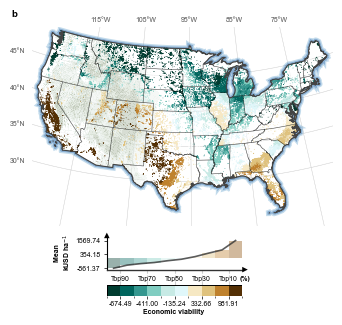

图片生成完成！


In [7]:
variable_config = [
    {
        'name': 'avg_npv',
        'title': 'Economic Viability', 
        'unit': 'kUSD ha$^{-1}$',
        'colors': [
            '#003c30', '#01665e', '#35978f', '#80cdc1', '#c7eae5',
            '#e0f7fa', '#f6e8c3', '#dfc27d', '#bf812d', '#8c510a', '#543005'
        ],
        'filename': 'economic_potential'
    }
]

# Use the first (and only) element of the list
cfg = variable_config[0]

fig, ax = plot_single_variable(
    merged_data_for_plot, 
    us_states_4326, 
    dem_us,
    cfg['name'],
    cfg['title'],
    cfg['unit'],
    cfg['colors']
)

fig.text(0.01, 0.99, 'b', ha='left', va='top', fontsize=7, fontweight='bold',
     bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)

# 保存图片
filename_png = f"figure/US_figure/{cfg['name']}_nature_style_300dpi.png"
filename_pdf = f"figure/US_figure/{cfg['name']}_nature_style_300dpi.pdf"

fig.savefig(filename_png, dpi=300, facecolor='White')  
fig.canvas.draw()
fig.savefig(filename_pdf, dpi=300, facecolor='None')                       

plt.show()
plt.close(fig)

print("图片生成完成！")